## **_Comparing Population vs. Sample Variance in Poisson Distrubutions:_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This analysis supplements a lesson from the Descriptive Statistics section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

### **_Query..._**

-   Population dispersion is calculated with `0` degrees of freedom: $\frac{1}{n}$ and sample dispersion with `1` degrees of freedom: $\frac{1}{n - 1}$. One element in a sample set is always necessarily dispensible since its value it determined if we have the mean and all the other values...

-   When measuring the variance/dispersion of a Poisson distribution, data which increases by one integer per element, does it matter which measure we use, _i.e._, $n - 1$ or $n$?

-   In the Python/NumPy methods `.std()` and `.var()` we set the degrees of freedom with the argument `ddof`. For population calculation we'll use the default `ddof=0`, and for the sample measure we'll use `ddof=1`.

-   We'll analyze on 10 separate Poisson distrubutions and determine whether or not `0` vs. `1` degrees of freedom makes any difference.

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

### **_Toolbox:_**

We'll measure dispersion using the Fano Factor and Coefficient of Variation formulas:

#### **_Fano Factor:_**

-   Variance divided by the Mean:

$$
\Large
    F = \frac{\sigma^2}{\mu}
$$

-   _via_ `np.var()`.

#### **_Coefficient of Variation:_**

-   Standard Deviation divided by the Mean:

$$
\Large
    CV = \frac{\sigma}{\mu}
$$

-   _via_ `np.std()`.

And we'll visualize the results in separate Matplotlib subplots, one for Fano and one CV.

Datasets will be slightly skewed vertically for visual clarity.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

### **_Code:_**

In [1]:
# Import libraries:
import matplotlib.pyplot as plt
import numpy as np

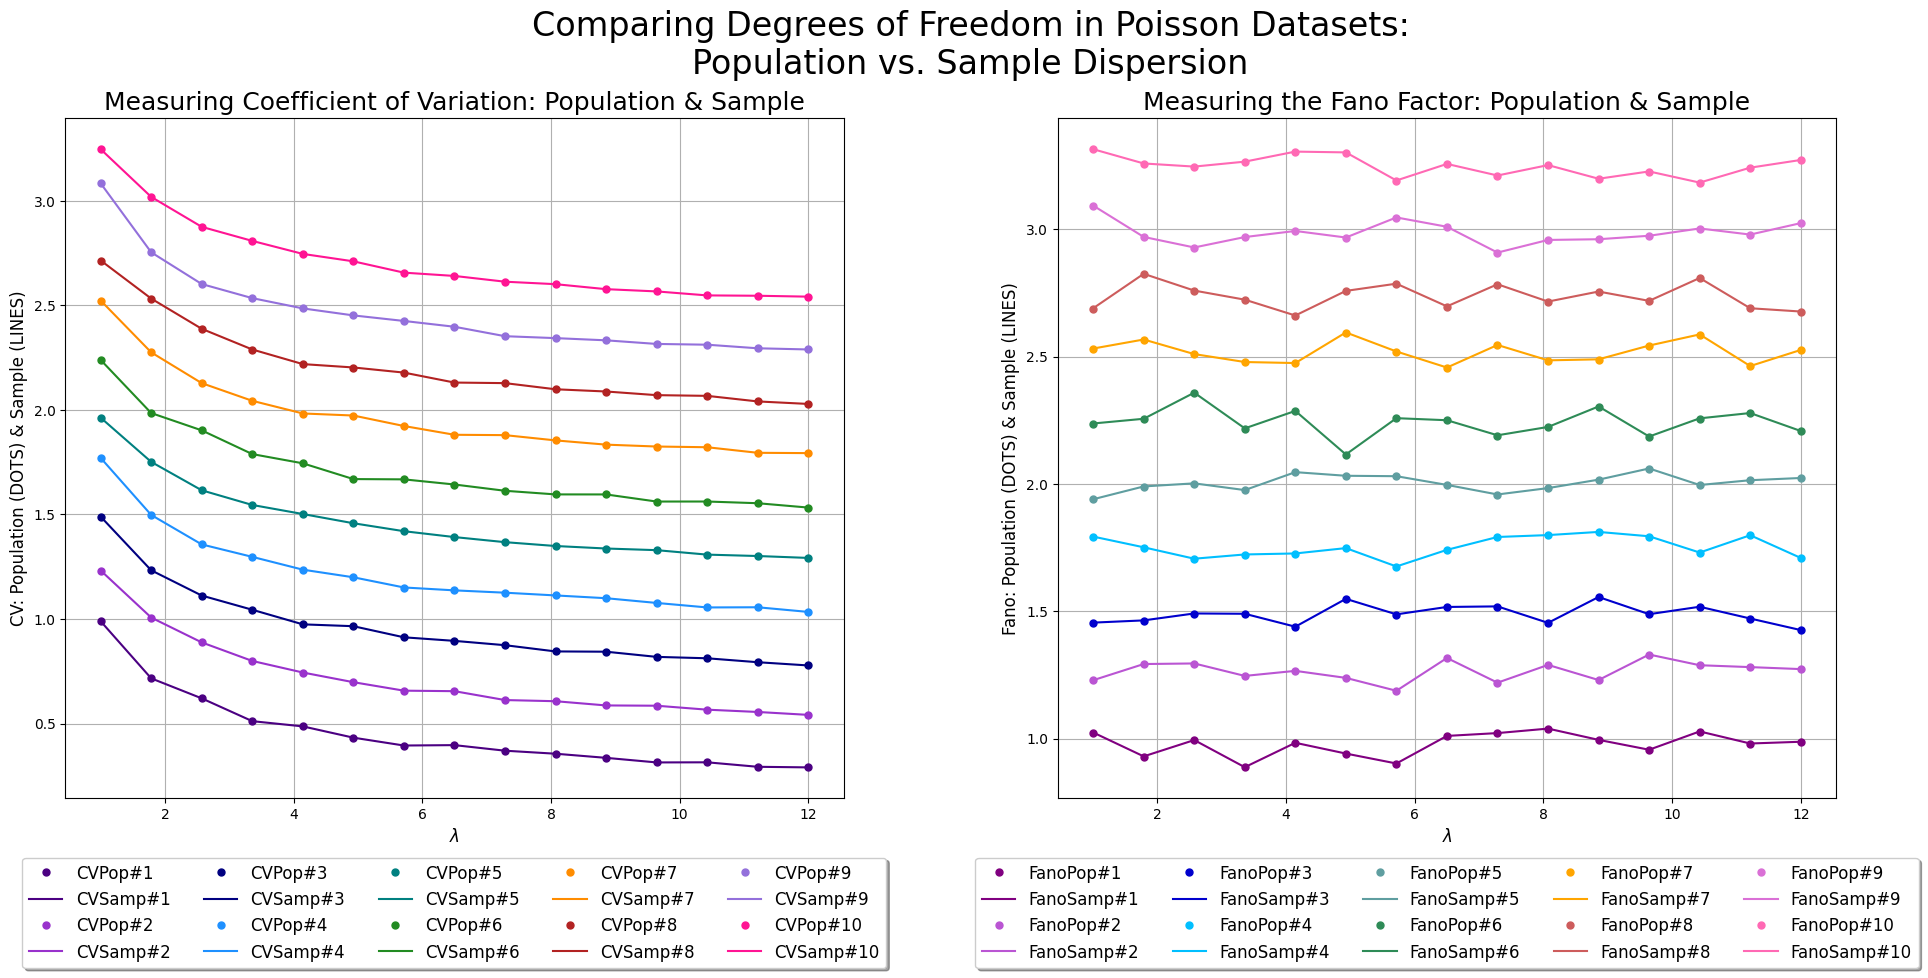

In [2]:
num_tests = 10

# Pairs of similar colors for analogous
#  plotting:
m_colors = [
    ("indigo", "purple"),
    ("darkorchid", "mediumorchid"),
    ("navy", "mediumblue"),
    ("dodgerblue", "deepskyblue"),
    ("teal", "cadetblue"),
    ("forestgreen", "seagreen"),
    ("darkorange", "orange"),
    ("firebrick", "indianred"),
    ("mediumpurple", "orchid"),
    ("deeppink", "hotpink"),
]

# List of parameters:
lambdas = np.linspace(1, 12, 15)

# Plot stuff:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Programmatic labels as lists of tuple pairs:
ax_0_labels = [(f"CVPop#{i + 1}", f"CVSamp#{i + 1}") for i in range(num_tests)]
ax_1_labels = [(f"FanoPop#{i + 1}", f"FanoSamp#{i + 1}") for i in range(num_tests)]

for i in range(num_tests):
    # Initialize output vectors:
    fano_pop = np.zeros(len(lambdas))
    fano_samp = np.zeros(len(lambdas))
    cv_pop = np.zeros(len(lambdas))
    cv_samp = np.zeros(len(lambdas))

    for l_i in range(len(lambdas)):
        # Generate new data:
        data = np.random.poisson(lambdas[l_i], 1000)

        # Compute the metrics, programatically skew each dataset:
        #  for clarity in viewing:
        cv_pop[l_i] = np.std(data, ddof=0) / np.mean(data) + i / 4
        cv_samp[l_i] = np.std(data, ddof=1) / np.mean(data) + i / 4
        fano_pop[l_i] = np.var(data, ddof=0) / np.mean(data) + i / 4
        fano_samp[l_i] = np.var(data, ddof=1) / np.mean(data) + i / 4

    # Left subplot:
    ax[0].plot(lambdas, cv_pop, '.', markersize=10, c=m_colors[i][0], label=ax_0_labels[i][0])
    ax[0].plot(lambdas, cv_samp, '-', c=m_colors[i][0], label=ax_0_labels[i][1])

    # Right subplot:
    ax[1].plot(lambdas, fano_pop, '.', markersize=10, c=m_colors[i][1], label=ax_1_labels[i][0])
    ax[1].plot(lambdas, fano_samp, '-', c=m_colors[i][1], label=ax_1_labels[i][1])


# ax[0].legend(ax_0_labels)
ax[0].set_ylabel("CV: Population (DOTS) & Sample (LINES)", size=12)
ax[0].set_title("Measuring Coefficient of Variation: Population & Sample", size=18)

# ax[1].legend(ax_1_labels)
ax[1].set_ylabel("Fano: Population (DOTS) & Sample (LINES)", size=12)
ax[1].set_title("Measuring the Fano Factor: Population & Sample", size=18)

# Populate shared subplot info programatically:
for i in range(2):
    ax[i].set_xlabel("$\\lambda$", size=12)
    ax[i].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.075),
        fancybox=True,
        shadow=True,
        ncol=5,
        fontsize=12,
    )
    ax[i].grid()

#  Super title:
sup_title = "Comparing Degrees of Freedom in Poisson Datasets"
sup_title += ":\nPopulation vs. Sample Dispersion"

plt.suptitle(sup_title, fontsize=24)

# Make space:
plt.tight_layout()
# Show the goods:
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Conclusions:_**

-   `0` vs `1` degrees of freedom have the same outcome in measuring variance/dispersion in Poisson distrubutions, as the values are (to the eye) identical. Perhaps there is a miniscule difference, but I think overall we can conclude that the aligned results supports this conclusion.

-   No difference whatsover, in other words...

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Portfolio: https://wateronchair.com/

</font>